<a href="https://colab.research.google.com/github/JuniaBS/Bootcamp-Data-Analytics./blob/main/11_Challenge_Modelos_de_Classifica%C3%A7%C3%A3o_Squad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação de Doenças Cardíacas

## Contexto:
O conjunto de dados utilizado é o Statlog Heart Disease, disponível no repositório UCI. Ele contém informações de 270 indivíduos e é composto por 14 colunas, selecionadas a partir de um conjunto maior que continha 75 colunas. Nesse conjunto, não há valores ausentes.
O objetivo desse conjunto de dados é realizar uma tarefa de classificação, onde se deve prever se uma pessoa tem ou não tem doença cardíaca. A variável de saída (o que queremos prever) é binária, sendo:
  0: a pessoa não sofre de doença cardíaca.
  1: a pessoa sofre de doença cardíaca.
Este é um estudo importante porque a saúde é um ponto vital de pesquisa para melhor ajudar os pacientes com certas condições. Além disso, a pressão arterial geralmente não apresenta sintomas e, no entanto, se a pressão alta não for tratada, pode ser um grande contribuinte para condições de saúde mais graves, como um derrame ou ataque cardíaco [2].

## Dicionário de dados
Este banco de dados contém 13 atributos e uma variável de destino.
Possui 8 valores nominais e 5 valores numéricos. A descrição detalhada de todos esses recursos é a seguinte:
  ● Age: idade dos pacientes em anos
  ● Sex: (Masculino: 1; Feminino: 0)
  ● cp: Tipo de dor torácica sentida pelo paciente. Este termo é categorizado em 4 categorias.
    ● 0 angina típica,
    ● 1 angina atípica,
    ● 2 dor não anginosa,
    ● 3 assintomática
  ● trestbps: nível de pressão arterial do paciente no modo de repouso em mm/HG
  ● chol: colesterol sérico em mg/dl
  ● fbs: Níveis de açúcar no sangue em jejum > 120 mg/dl representa 1 em caso de
verdadeiro e 0 como falso (Nominal) ●
restecg: O resultado do eletrocardiograma em repouso é representado em 3 valores
distintos
    0: Normal
    ● 1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV)
    ● 2: mostrando provável ou definitiva hipertrofia ventricular esquerda por Critérios de Estes
  ● thalach: frequência cardíaca máxima alcançada
  ● exang: Angina induzida pelo exercício
  ● 0 retratando Não
  ● 1 retratando Sim
  ● oldpeak: Depressão do ST induzida pelo exercício em relação ao estado de repouso
  ● slope: segmento ST medido em termos de inclinação durante o pico do exercício
    ● 0: inclinação ascendente;
    ● 1: plano;
    ● 2: inclinação descendente
  ● ca: O número de vasos principais (0–3) (nominal)
  ● thal: Um distúrbio sanguíneo chamado talassemia
    0: NULO
    ● 1: fluxo sanguíneo normal
    ● 2: defeito fixo (sem fluxo sanguíneo em alguma parte do coração)
    ● 3: defeito reversível (um fluxo sanguíneo é observado, mas não é normal (nominal)
  ● target: É a variável alvo que temos que prever 1 significa que o paciente sofre de doença cardíaca e 0 significa que o paciente é normal.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df_heart = pd.read_csv('Heart_disease_statlog.csv')

In [ ]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [ ]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [ ]:
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Perguntas:

##1- Faça uma análise exploratória dos dados, observando as principais variáveis e sua relação com a variável target.

## 2 - Construa um modelo de regressão logística para classificar se o indivíduo sofre de doença cardíaca ou não.

## 3 - Analise o resultado da regressão logística e plote a matriz de confusão.

In [ ]:
# Separar as características e a variável target
X = df_heart.drop('target', axis=1)
y = df_heart['target']

# Dividir o conjunto de dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



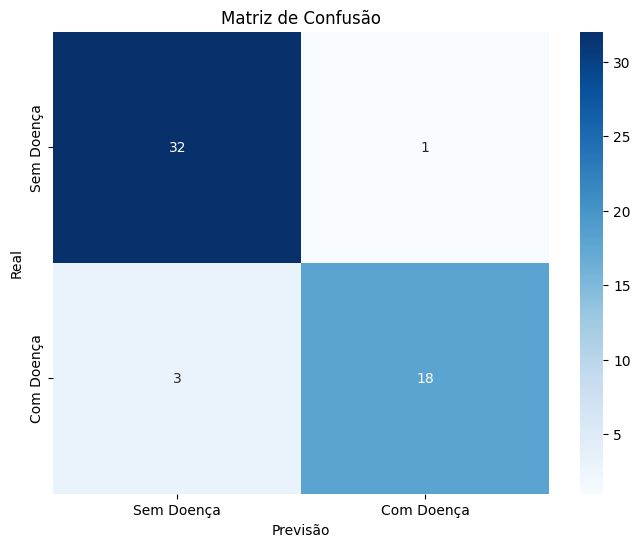

In [ ]:
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Doença', 'Com Doença'], yticklabels=['Sem Doença', 'Com Doença'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()